In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [92]:
img=cv2.imread('Data/car_plate.jpg')

In [93]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
def display(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

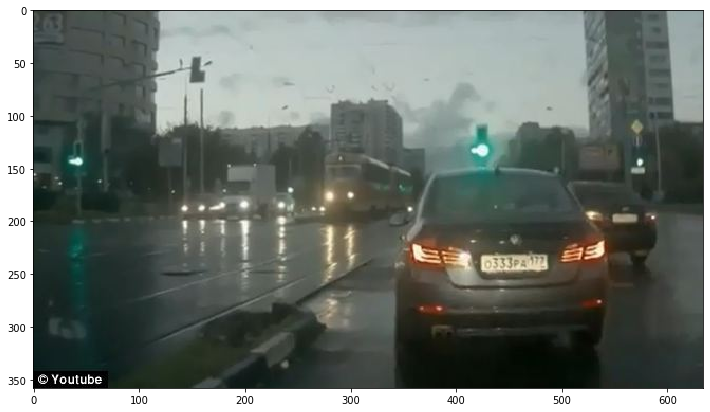

In [94]:
display(img)

In [95]:
numberplate_cascade=cv2.CascadeClassifier('Data/haarcascade_russian_plate_number.xml')

## DETECTING THE PLATE

In [96]:
def detect_plate(img):
    plate_img=img.copy()
    plate_rects=numberplate_cascade.detectMultiScale(plate_img,scaleFactor=1.2)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,0,0),3)
    return plate_img

In [97]:
result=detect_plate(img)

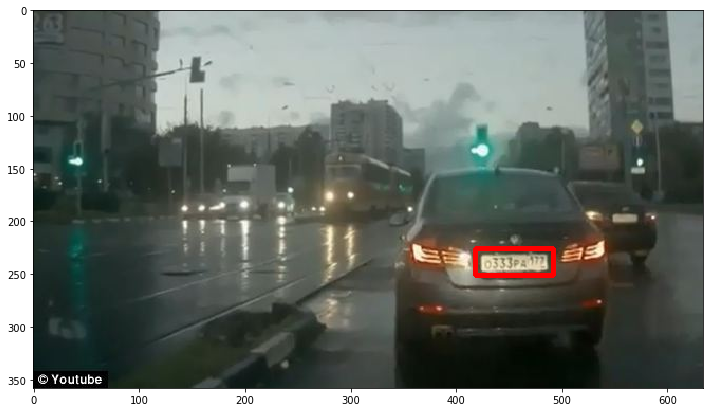

In [98]:
display(result)

## DETECTING AND BLURRING THE PLATE

In [99]:
def detect_and_blur_plate(img):
    full_img=img.copy()
    plate_rects=numberplate_cascade.detectMultiScale(full_img,scaleFactor=1.2)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(full_img,(x,y),(x+w,y+h),(255,0,0),3)
    img_crop=full_img[y:y+h,x:x+w]
    img_blur=cv2.medianBlur(img_crop,ksize=5)
    full_img[y:y+h,x:x+w]=img_blur
    return full_img

In [100]:
result1=detect_and_blur_plate(img)

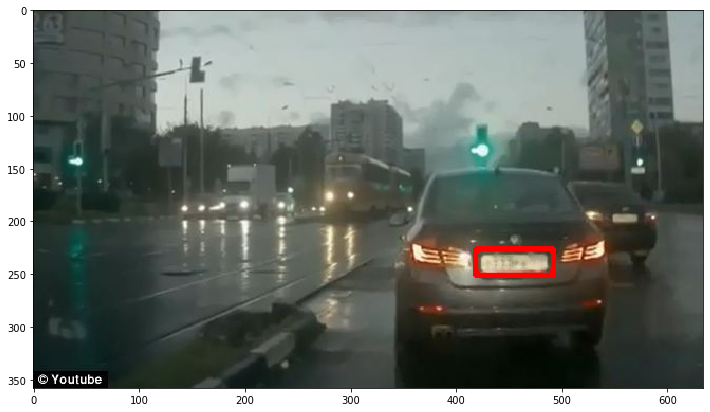

In [101]:
display(result1)